In [1]:
import os
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np

In [2]:
sleep_data = Path('Sleep_health_and_lifestyle_dataset.csv')
sleep_df = pd.read_csv(sleep_data)
sleep_df.head(20)
    

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [ ]:
sleep

In [3]:
sleep_df['BMI Category'] = sleep_df['BMI Category'].replace({'Normal Weight':'Normal'})
sleep2_df = sleep_df.loc[sleep_df['Sleep Disorder']!='Insomnia',:]
sleep2_df = sleep2_df.loc[sleep2_df['Sleep Disorder']!='Sleep Apnea',:]

sleep3_df = sleep_df.loc[sleep_df['Sleep Disorder']=='Sleep Apnea',:]
sleep4_df = sleep_df.loc[sleep_df['Sleep Disorder']=='Insomnia',:]
sleep3_df.head(50)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
16,17,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Sleep Apnea
17,18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea
30,31,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Sleep Apnea
49,50,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,Sleep Apnea
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
93,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea
103,104,Male,36,Teacher,6.6,5,35,7,Overweight,129/84,74,4800,Sleep Apnea


In [4]:
#How does stress and quantity of sleep influence your quality of sleep?

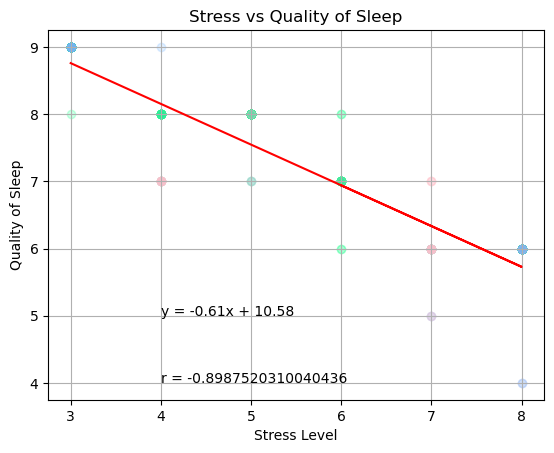

In [20]:
x = sleep_df['Stress Level']
y = sleep_df['Quality of Sleep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(sleep_df['Stress Level'],sleep_df['Quality of Sleep'],alpha=.1,color="green")
plt.scatter(sleep2_df['Stress Level'],sleep2_df['Quality of Sleep'],alpha=.1,color="#00FF80")
plt.scatter(sleep3_df['Stress Level'],sleep3_df['Quality of Sleep'],alpha=.1,color="#66B2FF")
plt.scatter(sleep4_df['Stress Level'],sleep4_df['Quality of Sleep'],alpha=.1,color="pink")
plt.plot(x,regress_values,"-r")
plt.annotate(line_eq,(4,5))
plt.annotate(f"r = {rvalue}",(4,4))
plt.title("Stress vs Quality of Sleep")
plt.ylabel("Quality of Sleep")
plt.xlabel("Stress Level")
plt.grid()
plt.show()
#We see a strong negative relationship between Stress and Quality of sleep.
#As stress levels rise, quality of sleep decreases.
#This is supported in our r value of -0.89
#Due to the restraint of the data and how they sampled the data, 
# a lot of points are stacked on top of each other.
#In order to work around this, I set the opacity level low so as 
#more data is stacked on top of each other, the darker the color.

In [6]:

MedSD = sleep_df['Sleep Duration'].median()
MedQS = sleep_df['Quality of Sleep'].median()
print(MedQS,MedSD)
sleep_df.describe()

7.0 7.2


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

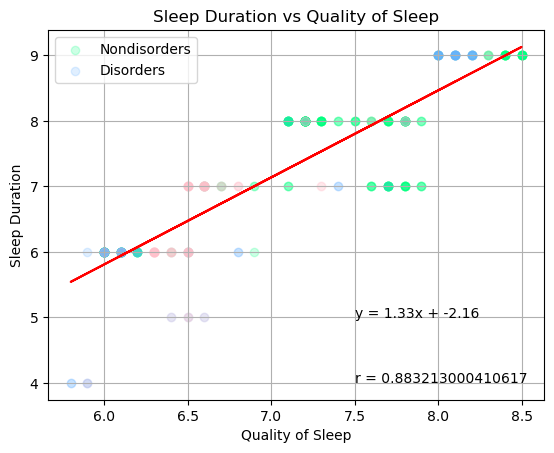

In [21]:
x = sleep_df['Sleep Duration']
y = sleep_df['Quality of Sleep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Duration_Quality = sleep_df[['Sleep Duration','Quality of Sleep']]
# Duration_Quality = Duration_Quality.set_index("Sleep Duration")
# plt.scatter(sleep_df['Sleep Duration'],sleep_df['Quality of Sleep'],alpha=.1,color="green")
plt.scatter(sleep2_df['Sleep Duration'],sleep2_df['Quality of Sleep'],alpha=.2,color="#00FF80")
plt.scatter(sleep3_df['Sleep Duration'],sleep3_df['Quality of Sleep'],alpha=.2,color="#66B2FF")
plt.scatter(sleep4_df['Sleep Duration'],sleep4_df['Quality of Sleep'],alpha=.2,color="pink")
plt.plot(x,regress_values,"-r")
plt.annotate(line_eq,(7.5,5))
plt.annotate(f"r = {rvalue}",(7.5,4))
plt.legend(["Nondisorders","Disorders"])
plt.title("Sleep Duration vs Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.xlabel("Quality of Sleep")
plt.grid()
plt.show
#Duration of sleep has a strong positive relationship with Quality of sleep. 
#This is support with the linear regrssion line being at r=0.88
#The graph is also seperated by people with and without sleep disorders.
# We can see that the majority of people with sleeping disorders have low amounts of sleep and bad quality of sleep.
#However there are a few people with sleeping disorders that have really high sleeping durations with great quality
#Majority of nondisorders have a stardard of 7-8 sleep with a 7.5-8 Quality.

<function matplotlib.pyplot.show(close=None, block=None)>

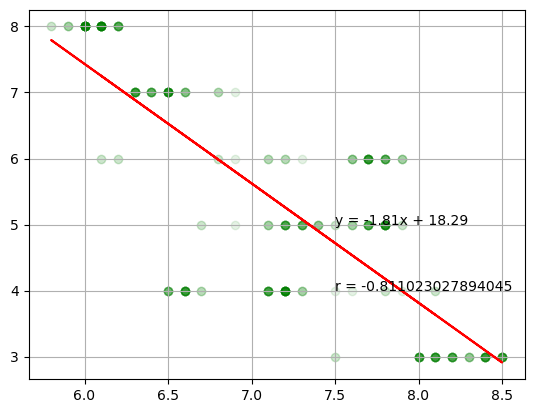

In [8]:
x = sleep_df['Sleep Duration']
y = sleep_df['Stress Level']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sleep_df['Sleep Duration'],sleep_df['Stress Level'],alpha=.1,color="green")
plt.plot(x,regress_values,"-r")
plt.annotate(line_eq,(7.5,5))
plt.annotate(f"r = {rvalue}",(7.5,4))
# plt.title("Sleep Duration vs Quality of Sleep")
# plt.ylabel("Sleep Duration")
# plt.xlabel("Quality of Sleep")
plt.grid()
plt.show

In [9]:
# Doctors = sleep_df.loc[sleep_df['Occupation']=='Doctor',:]
# Nurse = sleep_df.loc[sleep_df['Occupation']=='Nurse',:]
# Engineer = sleep_df.loc[sleep_df['Occupation']=='Engineer',:]
# Lawyer = sleep_df.loc[sleep_df['Occupation']=='Lawyer',:]
# Teacher = sleep_df.loc[sleep_df['Occupation']=='Teacher',:]
# Accountant = sleep_df.loc[sleep_df['Occupation']=='Accountant',:]
# Software_Engineer = sleep_df.loc[sleep_df['Occupation']=='Software Engineer',:]
# Sales_Representative = sleep_df.loc[sleep_df['Occupation']=='Sales Representative',:]
# Scientist = sleep_df.loc[sleep_df['Occupation']=='Scientist',:]
# Manager = sleep_df.loc[sleep_df['Occupation']=='Manager',:]
# Doctors["Sleep Duration"].mean()
# observed = pd.Series([Doctors["Sleep Duration"].mean(),Nurse["Sleep Duration"].mean(),Engineer["Sleep Duration"].mean(),Lawyer["Sleep Duration"].mean(),Teacher["Sleep Duration"].mean(),Accountant["Sleep Duration"].mean(),Software_Engineer["Sleep Duration"].mean(),Sales_Representative["Sleep Duration"].mean(),Scientist["Sleep Duration"].mean(),Manager["Sleep Duration"].mean()],index = ["Doctor", "Nurse","Engineer","Lawyer","Teacher","Accountant","Software_Engineer","Sales_Representative","Scientist","Manager"])
# df = pd.DataFrame([observed]).T     
# df[1] = sleep_df["Sleep Duration"].mean()
# df
# critcal_value = stats.chi2.ppf(q=0.95,df=2)critcal_value = stats.chi2.ppf(q=0.95,df=9)
# stats.chisquare(df[0],df[1])

F_onewayResult(statistic=16.433956757151233, pvalue=2.4760422792956595e-22)

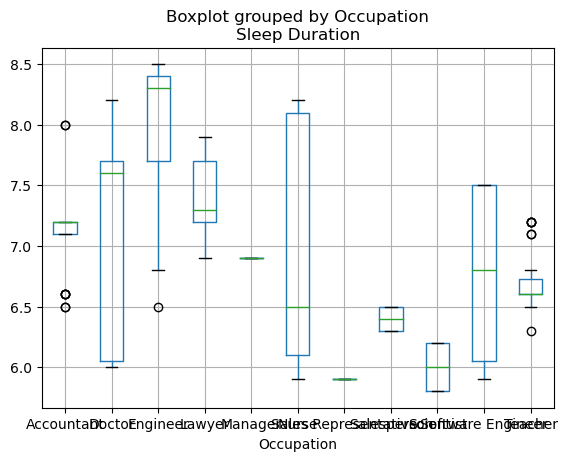

In [10]:
df2 = pd.DataFrame(sleep_df["Occupation"])
df2[1] = sleep_df["Sleep Duration"]
df2 = df2.rename(columns={0:"Occupation",1:"Sleep Duration"})
df2.boxplot("Sleep Duration", by = "Occupation")
g1 = df2[df2['Occupation']=='Doctor']["Sleep Duration"]
g2 = df2[df2['Occupation']=='Nurse']["Sleep Duration"]
g3 = df2[df2['Occupation']=='Engineer']["Sleep Duration"]
g4 = df2[df2['Occupation']=='Lawyer']["Sleep Duration"]
g5 = df2[df2['Occupation']=='Teacher']["Sleep Duration"]
g6 = df2[df2['Occupation']=='Accountant']["Sleep Duration"]
g7 = df2[df2['Occupation']=='Software Engineer']["Sleep Duration"]
g8 = df2[df2['Occupation']=='Sales Representative']["Sleep Duration"]
g9 = df2[df2['Occupation']=='Scientist']["Sleep Duration"]
g10 = df2[df2['Occupation']=='Manager']["Sleep Duration"]
stats.f_oneway(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10)


In [11]:
#Anova on BMI categoies vs quality of sleep
#How does your weight/BMI category influence your quality of sleep

F_onewayResult(statistic=32.51020214926935, pvalue=7.315462009074077e-14)

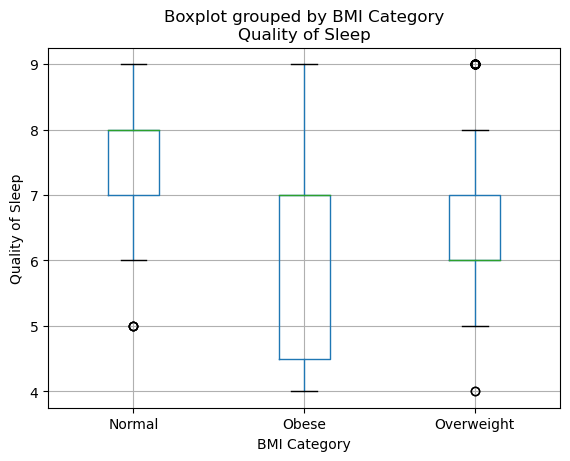

In [12]:
df3 = pd.DataFrame(sleep_df["BMI Category"])
df3[1] = sleep_df["Quality of Sleep"]
df3 = df3.rename(columns={0:"BMI Category",1:"Quality of Sleep"})
df3.boxplot("Quality of Sleep", by="BMI Category")
plt.ylabel("Quality of Sleep")
gr1 = df3[df3["BMI Category"]=="Normal"]["Quality of Sleep"]
gr2 = df3[df3["BMI Category"]=="Overweight"]["Quality of Sleep"]
gr3 = df3[df3["BMI Category"]=="Obese"]["Quality of Sleep"]
stats.f_oneway(gr1,gr2,g3)

F_onewayResult(statistic=17.412000191427445, pvalue=1.3883302958502746e-23)

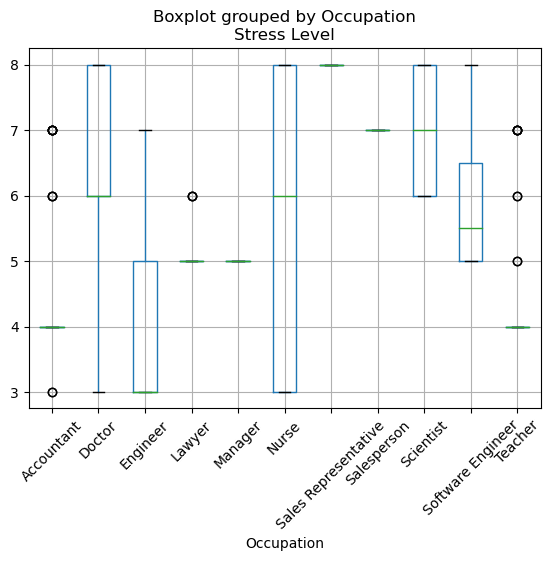

In [14]:
df2 = pd.DataFrame(sleep_df["Occupation"])
df2[1] = sleep_df["Stress Level"]
df2 = df2.rename(columns={0:"Occupation",1:"Stress Level"})
df2.boxplot("Stress Level", by = "Occupation",rot=45)
g1 = df2[df2['Occupation']=='Doctor']["Stress Level"]
g2 = df2[df2['Occupation']=='Nurse']["Stress Level"]
g3 = df2[df2['Occupation']=='Engineer']["Stress Level"]
g4 = df2[df2['Occupation']=='Lawyer']["Stress Level"]
g5 = df2[df2['Occupation']=='Teacher']["Stress Level"]
g6 = df2[df2['Occupation']=='Accountant']["Stress Level"]
g7 = df2[df2['Occupation']=='Software Engineer']["Stress Level"]
g8 = df2[df2['Occupation']=='Sales Representative']["Stress Level"]
g9 = df2[df2['Occupation']=='Scientist']["Stress Level"]
g10 = df2[df2['Occupation']=='Manager']["Stress Level"]
stats.f_oneway(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10)


In [51]:
group = sleep_df.groupby(["BMI Category"])["Quality of Sleep"]
print(group)
group.mean()



BMI Category
Normal        7.638889
Obese         6.400000
Overweight    6.898649
Name: Quality of Sleep, dtype: float64

In [52]:
group = sleep_df.groupby(["BMI Category"])
group.count()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
BMI Category,,,,,,,,,,,,
Normal,216,216,216,216,216,216,216,216,216,216,216,16
Obese,10,10,10,10,10,10,10,10,10,10,10,10
Overweight,148,148,148,148,148,148,148,148,148,148,148,129
